TODO : Mise en page du notebook

In [1]:
from cognitive_functions import *

In [2]:
df = pd.read_csv("data/clean/test_data.csv").drop("Unnamed: 0", axis=1)

In [3]:
timer_start = time()
for index, row in df.iterrows():
    results = results.append(
        {
            'Tweet': row['text'],
            'Target': row['target'],
            'Prédit': predict_sentiment(client, row['text'])
        },
        ignore_index=True)

timer_end = time() - timer_start

results['Target'] = results['Target'].replace([0, 4],
                                              [0, 1])
results = results[results['Prédit'] != 'neutral']
results['Prédit'] = results['Prédit'].replace(['negative', 'positive'],
                                              [0, 1])

print(f'Le nombre de ligne perdu est de {len(df)-len(results)}\
    sur un total de {len(df)} lignes, soit {len(results)/len(df)*100}%\
    de lignes conservé, le tout en {timer_end} secondes')

Le nombre de lignes perdu est de 332 sur un total de 1280 lignes, soit 74.0625% de lignes conservées le tout en 167.24 secondes


In [4]:
results

,Tweet,Target,Prédit
0,sounds like a good guide book phoooooto,1,1
1,is watching titanic,1,1
4,so if they are concluding that there are no su...,0,0
5,you know it s really sad that u know that ur c...,0,0
6,dope track but no download,0,0
...,...,...,...
1272,lord please gave jordin the power to sing plea...,1,1
1275,redoing work is the most depressing thing iv d...,0,0
1276,o o how could you do that i feel sick too some...,0,0
1277,i miss my baby in japan,0,1


In [5]:
from sklearn.metrics import roc_curve, auc, accuracy_score

# Test et prédiction
y_test = results.Target
y_pred = results.Prédit

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_score = auc(fpr, tpr)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

save_score_cognitive(score_cognitive, results, auc_score, accuracy)

[{'Modèle': 'Cognitive Service',
  'Durée (s)': '167.24',
  'Nb de lignes': '948.0',
  'Score ROC (%)': '76.131',
  'Accuracy (%)': '75.949'}]

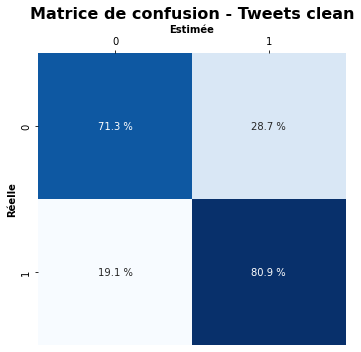

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       492
           1       0.72      0.81      0.76       456

    accuracy                           0.76       948
   macro avg       0.76      0.76      0.76       948
weighted avg       0.76      0.76      0.76       948



In [6]:
plot_confusion_matrix(y_test, y_pred)

In [7]:
score_cognitive.to_csv('data/clean/resultat_cognitive.csv')

In [8]:
score_cognitive = pd.read_csv('data/clean/resultat_cognitive.csv').drop("Unnamed: 0", axis=1)
score_cognitive

,Modèle,Durée (s),Nb de lignes,Score ROC (%),Accuracy (%)
0,Cognitive Service,167.24,948.0,76.131,75.949
